In [1]:
import vehicles as v
from graphviz import Source, render

In [2]:
#Create manager that holds the threshold device
mng = v.manager(verbose = True)

#Create an input node
sns = v.sensor(mng,(1,5))
at = v.actuator(mng)
#Create threshold nodes
t1 = v.threshold(mng,1)
t2 = v.threshold(mng,1)
t3 = v.threshold(mng,1)
t4 = v.threshold(mng,1)
t5 = v.threshold(mng,2)
t6 = v.threshold(mng,2)
t7 = v.threshold(mng,2)
t8 = v.threshold(mng,2)

In [3]:
#Define connections between nodes 0-activate , 1-inhibit
t1.add_consumer(t5,0)
t2.add_consumer(t6,0)
t3.add_consumer(t7,0)
t4.add_consumer(t8,0)
t8.add_consumer(at,0)
sns.add_consumer(t1,0,(0,4))
sns.add_consumer(t2,0,(0,3))
sns.add_consumer(t5,0,(0,3))
sns.add_consumer(t3,0,(0,2))
sns.add_consumer(t6,0,(0,2))
sns.add_consumer(t4,0,(0,1))
sns.add_consumer(t7,0,(0,1))
sns.add_consumer(t8,0,(0,0))

In [4]:
#Display connections --> activation, --| inhibition.
mng.display()

thr_C8BQ --> thr_Y85W with : wire_FYMF
thr_8T0L --> thr_E13Y with : wire_XZBR
thr_W3GC --> thr_40UA with : wire_MV0E
thr_FJSM --> thr_5A9N with : wire_NQTS
thr_5A9N --> act_BFWM with : wire_IUEA


In [5]:
#Generate the DOT representation of the manager/t. device
dot = mng.dot_generator()
#Read the DOT file with graphviz
src = Source(dot)
#Create and save the graph
src.render(filename='right2left_movement', directory='graph_output//right2left', format='png', cleanup=True)

digraph "device"{ graph [rankdir=LR] node [shape=circle] act_BFWM [color=black style=filled shape=doublecircle label="" width=0.30] thr_C8BQ [label ="1"] thr_8T0L [label ="1"] thr_W3GC [label ="1"] thr_FJSM [label ="1"] thr_Y85W [label ="2"] thr_E13Y [label ="2"] thr_40UA [label ="2"] thr_5A9N [label ="2"] thr_C8BQ -> thr_Y85W [arrowhead="rnormal"] thr_8T0L -> thr_E13Y [arrowhead="rnormal"] thr_W3GC -> thr_40UA [arrowhead="rnormal"] thr_FJSM -> thr_5A9N [arrowhead="rnormal"] thr_5A9N -> act_BFWM [arrowhead="rnormal"] input_RCT8 [color=black style=filled shape=circle label="" width=0.25] input_RCT8 -> thr_5A9N [arrowhead="rnormal"] input_VW4G [color=black style=filled shape=circle label="" width=0.25] input_VW4G -> thr_FJSM [arrowhead="rnormal"] input_VW4G -> thr_40UA [arrowhead="rnormal"] input_Q90X [color=black style=filled shape=circle label="" width=0.25] input_Q90X -> thr_W3GC [arrowhead="rnormal"] input_Q90X -> thr_E13Y [arrowhead="rnormal"] input_QJMZ [color=black style=filled sh

'graph_output//right2left\\right2left_movement.png'

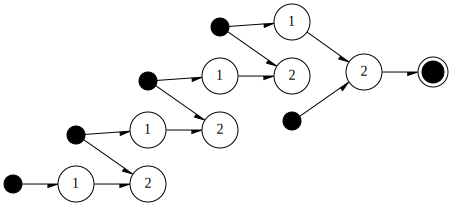

In [6]:
src

In [7]:
movement = [[0,0,0,0,1],
            [0,0,0,1,0],
            [0,0,1,0,0],
            [0,1,0,0,0],
            [1,0,0,0,0]]

In [8]:
for i in range(5):
    sns.feed(movement[i])
    mng.update()

[0, 0, 0, 0, 1]
Thresholds at time 0 after the signal: 
[1, 0, 0, 0, 0, 0, 0, 0]
Threshold outputs at time 0
thr_C8BQ --> wire_FYMF
Thresholds at time 0 after threshold update: 
[0, 0, 0, 0, 0, 0, 0, 0]
Wire outputs at time 0
thr_C8BQ --> thr_Y85W with : wire_FYMF
thr_8T0L --- thr_E13Y with : wire_XZBR
thr_W3GC --- thr_40UA with : wire_MV0E
thr_FJSM --- thr_5A9N with : wire_NQTS
thr_5A9N --- act_BFWM with : wire_IUEA
Thresholds at time 0 after wire update: 
[0, 0, 0, 0, 1, 0, 0, 0]
[0, 0, 0, 1, 0]
Thresholds at time 1 after the signal: 
[0, 1, 0, 0, 2, 0, 0, 0]
Threshold outputs at time 1
thr_8T0L --> wire_XZBR
Thresholds at time 1 after threshold update: 
[0, 0, 0, 0, 0, 0, 0, 0]
Wire outputs at time 1
thr_C8BQ --- thr_Y85W with : wire_FYMF
thr_8T0L --> thr_E13Y with : wire_XZBR
thr_W3GC --- thr_40UA with : wire_MV0E
thr_FJSM --- thr_5A9N with : wire_NQTS
thr_5A9N --- act_BFWM with : wire_IUEA
Thresholds at time 1 after wire update: 
[0, 0, 0, 0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
Thresholds